In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

In [2]:
%matplotlib inline
gr      = 1.618

pid_list   = [[11],[-13,13],[111,22],[2212],[-211,211]]
pid_labels = [r"$e^-$",r"$\mu^- / \mu^+$",r"$\gamma$",r"$proton$",r"$\pi^- / \pi^+$"]

# Parameters to geth the data mc ration in the right spot
ratio_x = 0.40
ratio_y = 8./9
ratio_text = r"$\frac{Beam \ ON}{Beam \ OFF + MC} = $"

#color=plt.cm.Set1.colors
#colors_new = [list(c) for c in color]
#colors_new[0] = (164./255, 16./255, 52/255) # Harvard red
#colors_new[1] = (0./255, 33./255, 71/255) # Oxford Blue
#colors_new[2] = (0./255, 112./255, 68/255) # Jesus green
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors_new)

In [38]:
min_dedx_hits=4
max_pitch = 1.5
min_reco_e=0.00
z_dead_start = 675
z_dead_end=z_dead_start+100
flux_corr = 1.028

pd.options.display.max_columns = 999

input_dir = "../../Input/flash_validation_new/" #This will be the validation folder soon.
output_dir = "../../Output/flash_validation/"

In [39]:
#The statistical uncertainity per bin of the binned data.
#If there are weights then the uncertainity will be the root of the
#sum of the weights squared.
def hist_bin_uncertainty(data, weights, bin_edges):
    # Bound the data and weights to be within the bin edges
    in_range_index = [idx for idx in range(len(data)) if data[idx] > min(bin_edges) and data[idx] < max(bin_edges)]
    in_range_data = np.asarray([data[idx] for idx in in_range_index])
    in_range_weights = np.asarray([weights[idx] for idx in in_range_index])

    # Bin the weights with the same binning as the data
    bin_index = np.digitize(in_range_data, bin_edges)
    # N.B.: range(1, bin_edges.size) is used instead of set(bin_index) as if
    # there is a gap in the data such that a bin is skipped no index would appear
    # for it in the set
    binned_weights = np.asarray(
        [in_range_weights[np.where(bin_index == idx)[0]] for idx in range(1, len(bin_edges))])
    bin_uncertainties = np.asarray(
        [np.sqrt(np.sum(np.square(w))) for w in binned_weights])
    return bin_uncertainties

In [40]:
df_sh_nu     = pd.read_pickle(input_dir+"nu/nu_shower_0.pckl")
df_sh_nue    = pd.read_pickle(input_dir+"nue/nue_shower_0.pckl")
df_sh_bnb    = pd.read_pickle(input_dir+"beam_on/beam_on_shower_0.pckl")
df_sh_bnbext = pd.read_pickle(input_dir+"beam_off/beam_off_shower_0.pckl")
df_sh_nu_overlaid = pd.read_pickle(input_dir+"nu_overlaid/nu_overlaid_shower_0.pckl")
df_sh_nu_tune3 = pd.read_pickle(input_dir+"nu_tune3/nu_tune3_shower_0.pckl")
df_sh_nu_lightbug = pd.read_pickle(input_dir+"nu_lightbug/nu_lightbug_shower_0.pckl")
df_sh_nu_induced = pd.read_pickle(input_dir+"nu_induced/nu_induced_shower_0.pckl")

df_sh_bnbext["bnbweight"]==1
df_sh_nu_overlaid["bnbweight"] = 1
# Name, Frame, POT, scaling factor, bool (yes: slace = bnb_pot/POT*scaling*weight)
df_arr = [("nu"         , df_sh_nu          , 1.99827881093e+20, flux_corr, 1),
          ("nue"        , df_sh_nue         , 2.41757769545e+22, flux_corr, 1),
          ("beam_on"    , df_sh_bnb         , 4.413e19         , 1        , 0),
          ("beam_off"   , df_sh_bnbext      , 4.413e19         , 9779224/14255249, 0),
          ("nu_overlaid", df_sh_nu_overlaid , 2.06428890689e+20, flux_corr, 1),
          ("nu_tune3"   , df_sh_nu_tune3    , 4.24442569577e+20, flux_corr, 1),
          ("nu_lightbug", df_sh_nu_lightbug , 9.10927647885e+19, flux_corr, 1),
          ("nu_induced" , df_sh_nu_induced  , 9.16447375224e+19, flux_corr, 1)
         ]

syst_plot_index = [0,4,5,6,7]

bnb_pot = df_arr[2][2]
nu_pot = df_arr[0][2]
ext_scale = df_arr[3][3]

In [41]:
# Before any cuts
print("Availible columns:")
for i in df_arr[0][1].columns:
    print(i, end=', ')
print("\nNumber of showers before any cut or weighting:")
for sample in df_arr:
    if sample[4]:
        sample[1]["bnbweight"]*=(bnb_pot/sample[2]*sample[3])
    else:
        sample[1]["bnbweight"]=sample[3]
    print(sample[0],"\t",sample[1]["bnbweight"].sum())
    

Availible columns:
shower_start_z, shower_daughter, shower_is_daughter, shower_dedx_hits_w, lepton_E, shower_energy_w, shower_hitsratio_w, passed, true_vz, shower_energy_product, shower_dir_z, shower_vtxdistance, n_showers, true_1eX_signal, bnbweight, vx, shower_dir_x, shower_maxangle, shower_hits_w, shower_pitch2, matched_showers_energy, shower_start_y, shower_start_x, candidate_pdg, shower_length, shower_spacepoint_dqdx_ratio, matched_showers, fiducial, numu_cuts, flash_PE_max, vy, shower_dedx_w, category, n_tracks, lepton_theta, shower_fidvol_ratio, shower_phi, shower_cle, shower_dedx_best_w, shower_theta, vz, shower_dir_y, shower_pca, shower_open_angle, track_bdt_precut, subrun, event, shower_ncluster, run, vtx_activity, __array_index, 
Number of showers before any cut or weighting:
nu 	 2569.032199581985
nue 	 77.98908664136842
beam_on 	 7407
beam_off 	 3784.7096748713398
nu_overlaid 	 2775.839161502282
nu_tune3 	 2567.507732079479
nu_lightbug 	 2504.945418215391
nu_induced 	 2985

In [42]:
df_sh_ok_list = []
for sample in df_arr:
    df=sample[1]
    print(sample[0],"\t",df["bnbweight"].sum())
    print(sum(df.groupby(['subrun','event',"run"])["bnbweight"].max()))
    df = df[~df["vz"].between(z_dead_start,z_dead_end)]
    print(len(df.groupby(['subrun','event',"run"])))
    print(sample[0],"\t",df["bnbweight"].sum())
    df = df[df["shower_dedx_hits_w"]>=min_dedx_hits]
    print(sample[0],"\t",df["bnbweight"].sum())
    df = df[df["shower_energy_w"]>=min_reco_e]
    df = df[df["shower_pitch2"]<=max_pitch]
    print(sample[0],"\t",df["bnbweight"].sum())
    print(len(df.groupby(['subrun','event',"run"])))
    print(sum(df.groupby(['subrun','event',"run"])["bnbweight"].max()))
    df_sh_ok_list.append(df)

nu 	 2569.032199581985
1284.741487786058
5208
nu 	 2310.4298360999755
nu 	 1521.140972173516
nu 	 1297.399187155036
3988
877.0031931149579
nue 	 77.98908664136842
37.245624859197406
25987
nue 	 77.22137544239118
nue 	 54.80882728559954
nue 	 50.62462355746279
22751
32.57612783822929
beam_on 	 7407
3663
3177
beam_on 	 6485
beam_on 	 3430
beam_on 	 2769
2015
2015
beam_off 	 3784.7096748713398
1920.824196055819
2455
beam_off 	 3326.455902383746
beam_off 	 1679.3491542659126
beam_off 	 1280.0921249428893
1453
996.7705560246236
nu_overlaid 	 2775.839161502282
1377.261026453453
5581
nu_overlaid 	 2489.7064255133682
nu_overlaid 	 1560.324443564738
nu_overlaid 	 1344.2964255331692
4191
921.0309497154346
nu_tune3 	 2567.507732079479
1285.125985834578
11078
nu_tune3 	 2322.1738265796894
nu_tune3 	 1532.9906441358214
nu_tune3 	 1311.1351863211742
8537
885.4738440787121
nu_lightbug 	 2504.945418215391
1274.2408614826365
2346
nu_lightbug 	 2238.0298269653686
nu_lightbug 	 1485.555514177279
nu_light

In [43]:
df_sh_nu = df_sh_ok_list[0]
df_sh_nue = df_sh_ok_list[1]
df_sh_bnb = df_sh_ok_list[2]
df_sh_bnbext = df_sh_ok_list[3]

In [44]:
df_sh_all = pd.concat([df_sh_nu,df_sh_nue],ignore_index=True) #dataframe for the area distributions plots

columns_shower_map  = ["shower_vtxdistance","shower_dedx_w", "shower_energy_w"]
labels = ["Vertex distance [cm]",r"d$E/$d$x$ at start [MeV/cm]", "Deposited energy [GeV]"]

x_axis_max = [10,6, 0.3]
x_axis_min = [0 ,0, 0]

/home/wouter/Binaries/miniconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


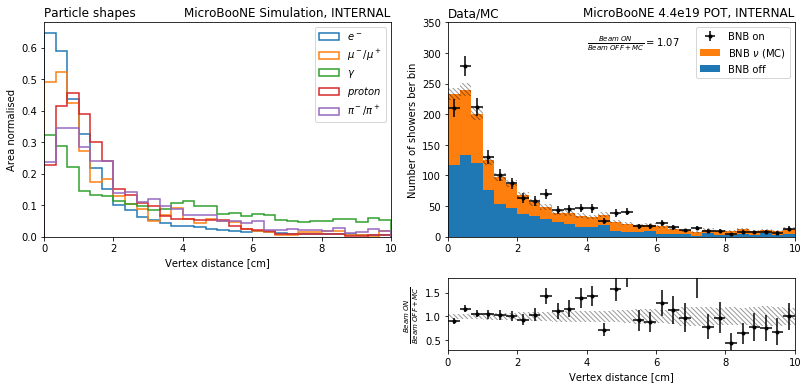

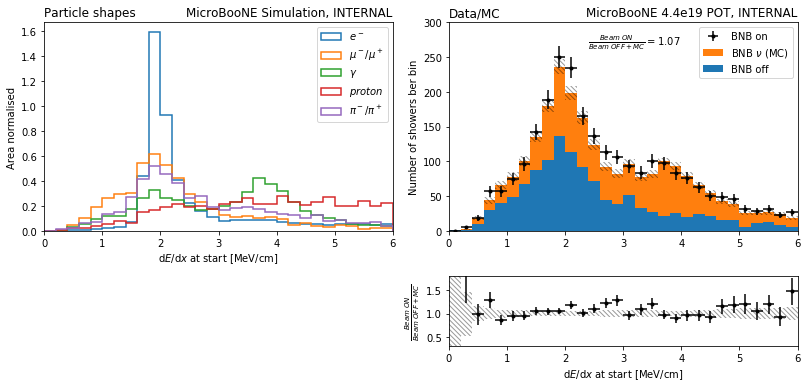

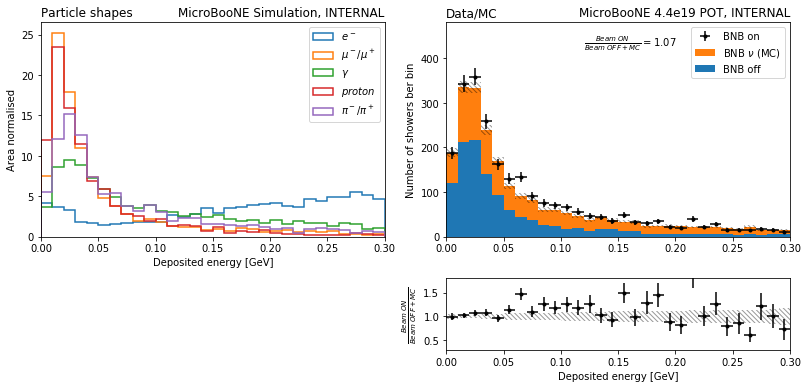

In [45]:
x_axis_arr  = ["shower_vtxdistance","shower_dedx_w", "shower_energy_w"]
x_label_arr = ["Vertex distance [cm]",r"d$E/$d$x$ at start [MeV/cm]", "Deposited energy [GeV]"]
x_min_arr = [0 , 0, 0]
x_max_arr = [10, 6.0, 0.3]
y_max_arr = [170,130,230]
y_max_arr = [350,300,480]

y_r_min=0.3
y_r_max=1.8
bins = 30

for x_axis, x_label, x_min, x_max, y_max in zip(x_axis_arr, x_label_arr, x_min_arr, x_max_arr, y_max_arr):
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(7*gr,5.5), gridspec_kw = {'height_ratios':[3, 1]})

    # Left plot
    data = df_sh_all[(df_sh_all["shower_cle"]==1)][x_axis]
    heights,edges,_ = ax[0][0].hist(data,bins=bins,alpha=1.0,range=(x_min,x_max),density=True,label=r"$e^-$",histtype="step", stacked=False, fill=False, lw=1.5)

    for pid,pid_lab in zip(pid_list[1:],pid_labels[1:]):
        data = df_sh_all[df_sh_all["matched_showers"].isin(pid)][x_axis]
        ax[0][0].hist(data,bins=bins,alpha=1.0,range=(x_min,x_max),density=True,label=pid_lab,histtype="step", stacked=False, fill=False, lw=1.5)
    
    ax[0][0].set_title(r"Particle shapes", loc='left')
    ax[0][0].set_title(r"MicroBooNE Simulation, INTERNAL", loc='right')
    ax[0][0].legend(loc="upper right")
    ax[0][0].set_xlabel(x_label)
    ax[0][0].set_ylabel("Area normalised")
    ax[0][0].set_xlim(x_min,x_max)
    fig.delaxes(ax[1][0])
    
    # Right plot
    bhalf = (x_max-x_min)/(2*bins)
    
    
    # MC+BNBext
    df_stacked = [df_sh_bnbext,df_sh_nu]
    lab_stacked = ["BNB off",r"BNB $\nu$ (MC)"]
    lower_total = 0
    err = [0] * bins
    
    for df_stack,lab in zip(df_stacked,lab_stacked):
        df_stack = df_stack[df_stack[x_axis].between(x_min,x_max)][[x_axis,"bnbweight"]]
        lower,edges,_ = ax[0][1].hist(df_stack[x_axis],bins=bins,weights=df_stack["bnbweight"], range=(x_min,x_max), stacked=False, fill=True,label=lab,bottom=lower_total) 
        err = np.sqrt(np.array(err)**2 + np.array(hist_bin_uncertainty(df_stack[x_axis].tolist(),df_stack["bnbweight"].tolist(),edges))**2 ) # This is only allowed in the case of 2 items
        lower_total+=lower

    #Data
    data_bnb   = df_sh_bnb[df_sh_bnb[x_axis].between(x_min,x_max)][[x_axis,"bnbweight"]]
    values,edges = np.histogram(data_bnb[x_axis],bins=bins,weights=data_bnb["bnbweight"],range=(x_min,x_max))
    ax[0][1].errorbar(edges[:-1]+bhalf, values, xerr=bhalf, yerr=np.sqrt(values),alpha=1.0, color= "k",fmt=".",label="BNB on")
    
    
    ax[0][1].set_title(r"Data/MC", loc='left')
    ax[0][1].set_title(r"MicroBooNE 4.4e19 POT, INTERNAL", loc='right')
    ax[1][1].set_xlabel(x_label)
    handles, labels = ax[0][1].get_legend_handles_labels()
    ax[0][1].legend(handles[::-1], labels[::-1],loc="upper right")
    ax[0][1].set_ylabel("Number of showers ber bin")
    ax[0][1].set_xlim(x_min,x_max)
    ax[0][1].set_ylim(0,y_max)
    
    ratio = df_sh_bnb["bnbweight"].sum() / ( df_sh_nu["bnbweight"].sum() + df_sh_bnbext["bnbweight"].sum() )
    y_max2 = ax[0][1].get_ylim()[1]
    ax[0][1].text(edges[round(bins*ratio_x)],ratio_y*y_max2,ratio_text+'{0:.2f}'.format(ratio))

    # Ratio plots
    ax[1][1].set_ylim(y_r_min,y_r_max)
    ax[1][1].set_xlim(x_min,x_max)
    ax[1][1].errorbar(edges[:-1]+bhalf, values/lower_total, xerr=bhalf, yerr=np.sqrt(values)/lower_total ,alpha=1.0, color= "k", fmt=".",label="Data error")

    for this_err,entry,bin_start,bin_end in zip(err,lower_total,edges[:-1],edges[1:]):
        ax[0][1].add_patch(patches.Rectangle( (bin_start, entry-this_err), bin_end-bin_start, this_err*2, hatch="\\\\\\\\\\",Fill=False, linewidth=0,alpha=0.4))
        sc_err = this_err/entry
        ax[1][1].add_patch(patches.Rectangle( (bin_start, 1-sc_err), bin_end-bin_start, sc_err*2, hatch='\\\\\\\\\\',Fill=False, linewidth=0,alpha=0.4))
    ax[1][1].set_ylabel(r'$\frac{Beam\ ON}{Beam\ OFF + MC}$')

    fig.tight_layout()
    fig.savefig((output_dir+x_axis+".pdf"))

In [34]:
df_sh_nu["matched_showers"].value_counts()

 22      2376
 13       416
 2212     302
 211      272
 11       214
-13       209
 2112     134
-211       97
-11        23
 321        8
 3222       2
 3112       1
-321        1
Name: matched_showers, dtype: int64

In [35]:
df_sh_nu["shower_cle"].value_counts()

#columns_shower_map  = ["shower_vtxdistance","shower_dedx_w", "shower_energy_w"]
#labels = ["Vertex distance [cm]",r"d$E/$d$x$ at start [MeV/cm]", "Deposited energy [GeV]"]
#
#x_axis_max = [10,6, 0.3]
#x_axis_min = [0 ,0, 0]

0    3924
1     131
Name: shower_cle, dtype: int64

0
4
5
6
7


/home/wouter/Binaries/miniconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/mlenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:3251: RuntimeWarning: invalid value encountered in double_scalars
  high = [thisx + thiserr for (thisx, thiserr)
/home/wouter/Binaries/miniconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


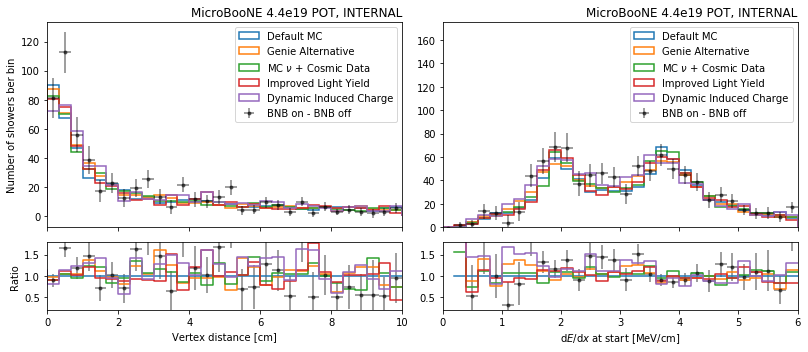

In [36]:
# Make systematics plots

fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(7*gr,5),sharex='col', gridspec_kw = {'height_ratios':[3, 1]})

y_r_min=0.2
y_r_max=1.8

#left
x_max=10
x_min=0
N=30
bhalf = (x_max-x_min)/(2*N)
x_axis = "shower_vtxdistance"

lab = ["Default MC", "Genie Alternative", r"MC $\nu$ + Cosmic Data", "Improved Light Yield", "Dynamic Induced Charge"]
j=0
bins = []
for i, sample in enumerate(df_sh_ok_list):
    if i in syst_plot_index:
        values,edges,_ = ax[0][0].hist(sample[x_axis],bins=N,range=(x_min,x_max), histtype='step', 
                                      weights=sample["bnbweight"], label=lab[j],lw=1.5) 
        bins.append(values)
        j+=1

bnb_on, _ = np.histogram(df_sh_bnb[x_axis],bins=N,range=(x_min,x_max), weights=df_sh_bnb["bnbweight"])
bnb_off, _ = np.histogram(df_sh_bnbext[x_axis],bins=N,range=(x_min,x_max), weights=df_sh_bnbext["bnbweight"]) 
err_on_off = np.sqrt ( bnb_on + np.array(hist_bin_uncertainty(df_sh_bnbext[x_axis].tolist(),df_sh_bnbext["bnbweight"].tolist(),edges))**2)
ax[0][0].errorbar(edges[:-1]+bhalf, bnb_on-bnb_off, xerr=bhalf, yerr=err_on_off,alpha=0.5, color= "k",fmt=".",label="BNB on - BNB off")

ax[0][0].set_title(r"MicroBooNE 4.4e19 POT, INTERNAL", loc='right')

ax[1][0].set_xlabel(r"Vertex distance [cm]")
ax[0][0].set_ylabel(r"Number of showers ber bin")
ax[0][0].legend(loc="upper right")
ax[0][0].set_xlim(x_min,x_max)

ax[1][0].errorbar(edges[:-1]+bhalf, (bnb_on-bnb_off)/bins[0], xerr=bhalf, yerr=err_on_off/bins[0] ,alpha=0.5, color= "k", fmt=".")
ratios = bins/bins[0]
for ratio in ratios:
    ratio = np.append(ratio[1], ratio)
    ax[1][0].plot(edges,ratio,ls='steps')
    
ax[1][0].set_ylabel('Ratio')
ax[1][0].set_ylim(y_r_min,y_r_max)



#right
x_min = 0
x_max = 6
y_max = 175
x_axis = "shower_dedx_w"
bhalf = (x_max-x_min)/(2*N)

j=0
bins = []
for i, sample in enumerate(df_sh_ok_list):
    if i in syst_plot_index:
        print(i)
        values,edges,_ = ax[0][1].hist(sample[x_axis],bins=N,range=(x_min,x_max), histtype='step', 
                                     weights=sample["bnbweight"], label=lab[j],lw=1.5) 
        bins.append(values)
        j+=1

bnb_on, _ = np.histogram(df_sh_bnb[x_axis],bins=N,range=(x_min,x_max), weights=df_sh_bnb["bnbweight"])
bnb_off, _ = np.histogram(df_sh_bnbext[x_axis],bins=N,range=(x_min,x_max), weights=df_sh_bnbext["bnbweight"]) 
err_on_off = np.sqrt ( bnb_on + np.array(hist_bin_uncertainty(df_sh_bnbext[x_axis].tolist(),df_sh_bnbext["bnbweight"].tolist(),edges))**2)
ax[0][1].errorbar(edges[:-1]+bhalf, bnb_on-bnb_off, xerr=bhalf, yerr=err_on_off,alpha=0.5, color= "k",fmt=".",label="BNB on - BNB off")

ax[1][1].errorbar(edges[:-1]+bhalf, (bnb_on-bnb_off)/bins[0], xerr=bhalf, yerr=err_on_off/bins[0] ,alpha=0.5, color= "k", fmt=".")
ratios = bins/bins[0]
for ratio in ratios:
    ratio = np.append(ratio[1], ratio)
    ax[1][1].plot(edges,ratio,ls='steps')
    
ax[1][1].set_ylim(y_r_min,y_r_max)
ax[1][1].set_xlabel(r"d$E/$d$x$ at start [MeV/cm]")
ax[0][1].set_title(r"MicroBooNE 4.4e19 POT, INTERNAL", loc='right')
ax[0][1].legend(loc="upper right")
ax[0][1].set_xlim(x_min,x_max)
ax[0][1].set_ylim(0,y_max)

fig.tight_layout(h_pad=0.5)
fig.savefig( output_dir+"syst_shower1.pdf")

/home/wouter/Binaries/miniconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/home/wouter/Binaries/miniconda3/envs/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


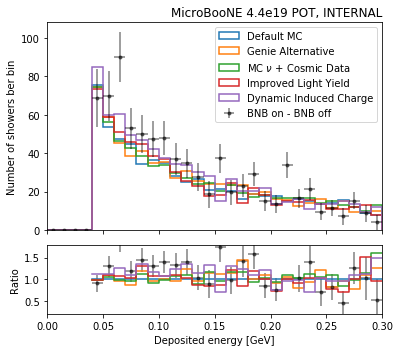

In [37]:
# Make systematics plots

fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(3.5*gr,5),sharex='col', gridspec_kw = {'height_ratios':[3, 1]})

y_r_min=0.2
y_r_max=1.8

#left
x_max=0.3
x_min=0
N=30
bhalf = (x_max-x_min)/(2*N)

x_axis = "shower_energy_w"

lab = ["Default MC", "Genie Alternative", r"MC $\nu$ + Cosmic Data", "Improved Light Yield", "Dynamic Induced Charge"]
j=0
bins = []
for i, sample in enumerate(df_sh_ok_list):
    if i in syst_plot_index:
        values,edges,_ = ax[0].hist(sample[x_axis],bins=N,range=(x_min,x_max), histtype='step', 
                                      weights=sample["bnbweight"], label=lab[j],lw=1.5) 
        bins.append(values)
        j+=1

bnb_on, _ = np.histogram(df_sh_bnb[x_axis],bins=N,range=(x_min,x_max), weights=df_sh_bnb["bnbweight"])
bnb_off, _ = np.histogram(df_sh_bnbext[x_axis],bins=N,range=(x_min,x_max), weights=df_sh_bnbext["bnbweight"]) 
err_on_off = np.sqrt ( bnb_on + np.array(hist_bin_uncertainty(df_sh_bnbext[x_axis].tolist(),df_sh_bnbext["bnbweight"].tolist(),edges))**2)
ax[0].errorbar(edges[:-1]+bhalf, bnb_on-bnb_off, xerr=bhalf, yerr=err_on_off,alpha=0.5, color= "k",fmt=".",label="BNB on - BNB off")
ax[0].set_title(r"MicroBooNE 4.4e19 POT, INTERNAL", loc='right')

ax[1].set_xlabel(r"Deposited energy [GeV]")
ax[0].set_ylabel(r"Number of showers ber bin")
ax[0].legend(loc="upper right")
ax[0].set_xlim(x_min,x_max)

ratios = bins/bins[0]
ax[1].errorbar(edges[:-1]+bhalf, (bnb_on-bnb_off)/bins[0], xerr=bhalf, yerr=err_on_off/bins[0] ,alpha=0.5, color= "k", fmt=".")
for ratio in ratios:
    ratio = np.append(ratio[1], ratio)
    ax[1].plot(edges,ratio,ls='steps')

    
ax[1].set_ylabel('Ratio')
ax[1].set_ylim(y_r_min,y_r_max)

fig.tight_layout(h_pad=0.5)
fig.savefig( output_dir+"syst_shower2.pdf")